In [1]:
import json, yaml
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open("database9.json", "r") as readfile:
    database_statespace = (json.load(readfile))["data"]
with open("databasetransfer.json", "r") as readfile:
    database_transfer = (json.load(readfile))["data"]
# with open("database10.json", "r") as readfile:
#     database_platform = (json.load(readfile))["data"]
with open("../literature.yaml") as readfile:
    literature = (yaml.safe_load(readfile))

In [3]:
bridge_data = {cesmd: {"sort_id": i} for i,cesmd in enumerate([
    "CE01336",
    "CE89324",
    "CE54730",
    "CE89708",
    "CE79421",
    "CE89686",
    "CE89735",
    "CE13795",
    "CE24704",
    "CE33742",
    "CE24775",
    "CE24706",
    "CE47315",
    "CE23631",
    "CE24694",
    "CE58658",
    "CE13705",
    "CE89736",
    "CE68185",
    "CE14406",
    "CE68184",
    "CE89973",
])}

In [4]:
station_ids = bridge_data.keys()

In [5]:
for station_id in station_ids:
    for station_id,sources in literature.items():
        if sources is not None:
            bridge_data[station_id]["literature"] = {}
            literature_periods = [method for source in sources.values() for event in source for method in event for period in method if period is not None]
            bridge_data[station_id]["literature"]["distribution"] = [period for method in literature_periods for period in method]
            bridge_data[station_id]["literature"]["first"] = [method[0] for method in literature_periods]


first_periods_literature = {station_id: [method[0] for source in sources.values() for event in source for method in event if method[0] is not None] for station_id,sources in literature.items() if sources is not None}
periods_literature= {station_id: [period for source in sources.values() for event in source for method in event for period in method if period is not None] for station_id,sources in literature.items() if sources is not None}

In [6]:
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["n_events"] = len(station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"])
    bridge_data[station_data["cesmd"]]["n_events_filtered"] = len([evaluation for evaluation in station_data["events"]
                                                                if len([mode for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                                                    if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0])


n_events = {station_data["cesmd"]: len(station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"]) for station_data in database_statespace}
n_events_filtered = {station_data["cesmd"]: len([evaluation for evaluation in station_data["events"]
                                                    if len([mode for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                                                if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0])
                            for station_data in database_statespace}

In [7]:
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"] = {}
    distribution = [np.max([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]]) 
                        for evaluation in station_data["events"] 
                        if len(evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]) > 0]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"]["average"] = np.average(distribution) if len(distribution) > 0 else 0.0

# average_first_periods = {station_id: (np.average([first_periods[station_id]]) if len(first_periods[station_id]) > 0 else 0.0) for station_id in station_ids}
# average_first_periods_sorted = sorted(average_first_periods.items(), key=lambda x: average_first_periods[x[0]])

In [8]:
# first_periods_filtered = {}
# for station_data in database_statespace:
#     station_id = station_data["cesmd"]
#     first_periods_filtered[station_id] = [np.max([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
#                                                   if mode["emac"]>0.5 and mode["mpc"]>0.5]) 
#                                             for evaluation in station_data["events"] 
#                                             if len([mode for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
#                                                      if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0]
# average_first_periods_filtered = {station_id: (np.average([first_periods_filtered[station_id]]) if len(first_periods_filtered[station_id]) > 0 else 0.0) for station_id in station_ids}
# average_first_periods_filtered_sorted = sorted(average_first_periods_filtered.items(), key=lambda x: average_first_periods_filtered[x[0]])
# len(average_first_periods_filtered_sorted)

for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"] = {}
    distribution = [np.max([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                if mode["emac"]>0.5 and mode["mpc"]>0.5]) 
                        for evaluation in station_data["events"] 
                        if len([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"]["average"] = np.average(distribution) if len(distribution) > 0 else 0.0

In [ ]:
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"] = {}
    distribution = [event["period"] for event in station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["average"] = np.average(distribution)

# average_best_periods = {
#     station["cesmd"]: np.average([event["period"] for event in station["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event])
#     for station in database_statespace
# }
# average_best_periods_sorted = sorted(average_best_periods.items(), key=lambda x: average_best_periods[x[0]])

/home/xstal/mambaforge/envs/brace-platform/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/xstal/mambaforge/envs/brace-platform/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


22

In [ ]:
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"] = {}
    distribution = [event["period"] for event in station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["average"] = np.average(distribution)

average_best_periods_filtered = {
    station["cesmd"]: np.average([event["period"] for event in station["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event and event["emac"] > 0.5 and event["mpc"] > 0.5])
    for station in database_statespace
}
average_best_periods_filtered_sorted = sorted(average_best_periods_filtered.items(), key=lambda x: average_best_periods_filtered[x[0]])
len(average_best_periods_filtered_sorted)

22

In [9]:
for station_data in database_transfer:
    bridge_data[station_data["cesmd"]]["platform"]["transfer"] = {}
    distribution = [result["data"][0]["period"] for event in station_data["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='R1' if len(result["data"])>0]
    bridge_data[station_data["cesmd"]]["platform"]["transfer"]["response_spectrum"] = distribution
    distribution = [result["data"][0]["period"] for event in station_data["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='F1' if len(result["data"])>0]
    bridge_data[station_data["cesmd"]]["platform"]["transfer"]["fourier"] = distribution
    
# response_periods = {
#     station["cesmd"]: [result["data"][0]["period"] for event in station["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='R1' if len(result["data"])>0]
#     for station in database_transfer
# }
# fourier_periods = {
#     station["cesmd"]: [result["data"][0]["period"] for event in station["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='F1' if len(result["data"])>0]
#     for station in database_transfer
# }

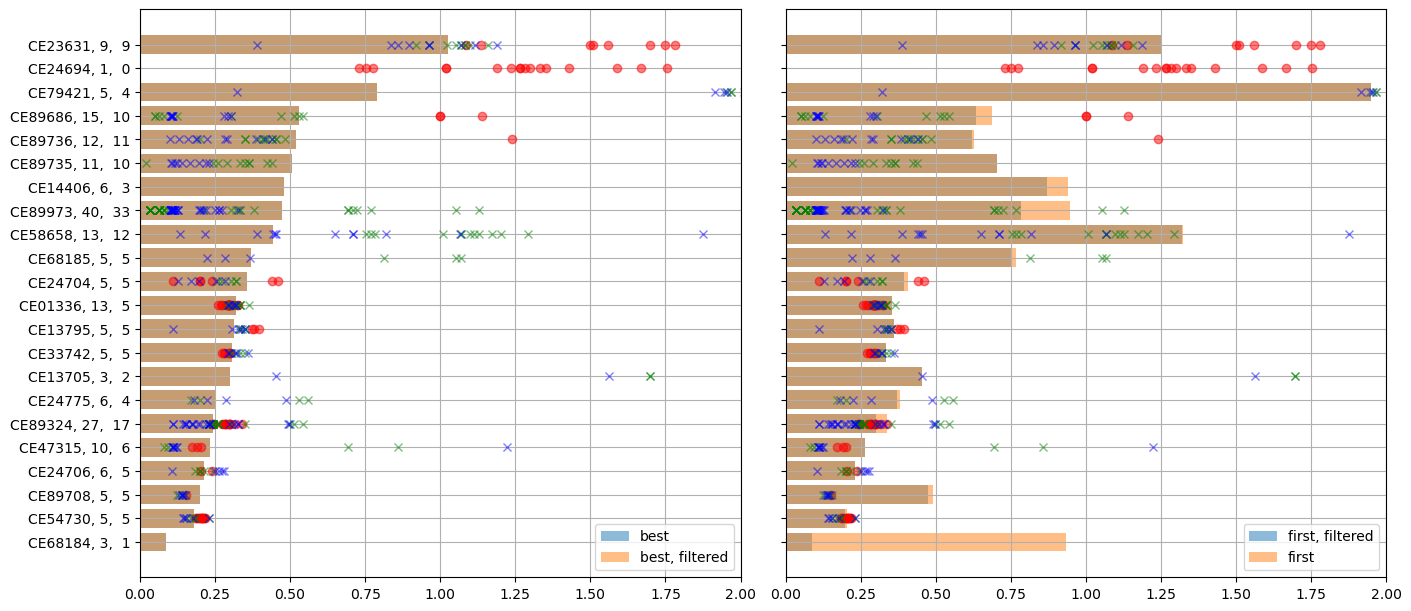

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,6), constrained_layout=True, sharey=True)
ax[0].barh([f"{station[0]}, {str(n_events[station[0]])},  {str(n_events_filtered[station[0]])}" for station in average_best_periods_sorted], [station[1] for station in average_best_periods_sorted], label="best", alpha=0.5)
ax[0].barh([f"{station[0]}, {str(n_events[station[0]])},  {str(n_events_filtered[station[0]])}" for station in average_best_periods_filtered_sorted], [station[1] for station in average_best_periods_filtered_sorted], label="best, filtered", alpha=0.5)
for station in bridge_data.keys():
    # ax[0].plot(periods_literature[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(periods_literature[station]),"bo",alpha=0.5)
    ax[0].plot(first_periods_literature[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(first_periods_literature[station]),"ro",alpha=0.5)
    # ax[1].plot(periods_literature[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(periods_literature[station]),"bo",alpha=0.5)
    ax[1].plot(first_periods_literature[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(first_periods_literature[station]),"ro",alpha=0.5)
for station in response_periods.keys():
    ax[0].plot(response_periods[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(response_periods[station]),"gx",alpha=0.5)
    ax[1].plot(response_periods[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(response_periods[station]),"gx",alpha=0.5)
for station in fourier_periods.keys():
    ax[0].plot(fourier_periods[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(fourier_periods[station]),"bx",alpha=0.5)
    ax[1].plot(fourier_periods[station],[f"{station}, {str(n_events[station])},  {str(n_events_filtered[station])}"]*len(fourier_periods[station]),"bx",alpha=0.5)
# ax[0].set_xlim(0,8)
ax[0].set_xlim(0,2)
ax[0].legend()
ax[1].barh([f"{station[0]}, {str(n_events[station[0]])},  {str(n_events_filtered[station[0]])}" for station in average_first_periods_filtered_sorted], [station[1] for station in average_first_periods_filtered_sorted], label="first, filtered", alpha=0.5)
ax[1].barh([f"{station[0]}, {str(n_events[station[0]])},  {str(n_events_filtered[station[0]])}" for station in average_first_periods_sorted], [station[1] for station in average_first_periods_sorted], label="first", alpha=0.5)
# ax[1].set_xlim(0,8)
ax[1].set_xlim(0,2)
ax[1].legend()
for i in range(2): ax[i].grid("on")

In [ ]:
bridges = [[
    "CE01336",
    "CE89324",
    "CE54730",
    "CE89708",
    ], [
    "CE79421",
    "CE89686",
    "CE89735",
    "CE13795",
    "CE24704",
    "CE33742",
    "CE24775",
    "CE24706",
    "CE47315",
    ], [
    "CE23631",
    "CE24694",
    "CE58658",
    "CE13705",
    "CE89736",
    ], [
    "CE68185",
    "CE14406",
    "CE68184",
    "CE89973",
]]

for group in bridges:
    for i,bridge in enumerate(group):
        print(bridge,  end=" \t")
        for ref in [average_best_periods_filtered_sorted,
                        average_first_periods_filtered_sorted, average_first_periods_sorted]:
            # list(...) is just turning the first column of ref into a list
            grouped_ref = [i for i in list(zip(*ref))[0] if i in group]
            idx = grouped_ref.index(bridge)
            print(idx, end="\t")
        print("")
    print("-"*10)

CE01336 	3	2	2	
CE89324 	2	1	1	
CE54730 	0	0	0	
CE89708 	1	3	3	
----------
CE79421 	8	8	8	
CE89686 	7	6	6	
CE89735 	6	7	7	
CE13795 	4	3	3	
CE24704 	5	5	5	
CE33742 	3	2	2	
CE24775 	2	4	4	
CE24706 	0	0	0	
CE47315 	1	1	1	
----------
CE23631 	4	3	3	
CE24694 	3	0	0	
CE58658 	1	4	4	
CE13705 	0	1	1	
CE89736 	2	2	2	
----------
CE68185 	1	1	0	
CE14406 	3	3	2	
CE68184 	0	0	1	
CE89973 	2	2	3	
----------
